In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load the Excel file
file_path = '/content/Data Analyst Intern Assignment - Excel.xlsx'
assignmet = pd.ExcelFile(file_path)

# Check sheet names to inspect the structure of the file
assignmet.sheet_names

# Load the data from the three sheets
user_details = pd.read_excel(assignmet, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(assignmet, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(assignmet, sheet_name='OrderDetails.csv')

# Display the first few rows of each dataset
user_details.head(), cooking_sessions.head(), order_details.head()

(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

In [15]:
# Check for missing values
user_details_missing = user_details.isnull().sum()
cooking_sessions_missing = cooking_sessions.isnull().sum()
order_details_missing = order_details.isnull().sum()

print("Missing values in UserDetails:")
print(user_details_missing)

print("\nMissing values in CookingSessions:")
print(cooking_sessions_missing)

print("\nMissing values in OrderDetails:")
print(order_details_missing)


Missing values in UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing values in CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing values in OrderDetails:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [16]:
# Handle missing ratings in OrderDetails by filling them with the average rating
order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())

In [17]:
# Merge datasets on Session ID first
merged_data = pd.merge(order_details, cooking_sessions, on="Session ID", how="inner")

# Check the column names after the first merge
print("Column names after merging OrderDetails and CookingSessions:")
print(merged_data.columns)

Column names after merging OrderDetails and CookingSessions:
Index(['Order ID', 'User ID_x', 'Order Date', 'Meal Type_x', 'Dish Name_x',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID',
       'User ID_y', 'Dish Name_y', 'Meal Type_y', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')


In [23]:
meal_type_analysis = merged_data.groupby('Meal Type_x').agg(
    total_orders=('Order ID', 'count'),
    avg_session_duration=('Duration (mins)', 'mean')
).reset_index()

In [18]:
# Rename User ID columns to be consistent
merged_data = merged_data.rename(columns={'User ID_y': 'User ID'})

# Now proceed to merge with the user details dataset
merged_data = pd.merge(merged_data, user_details, on="User ID", how="inner")

# Check the final result
merged_data.head()

,Order ID,User ID_x,Order Date,Meal Type_x,Dish Name_x,Order Status,Amount (USD),Time of Day,Rating,Session ID,...,Duration (mins),Session Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.000000,S001,...,30,4.5,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.000000,S002,...,20,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.285714,S003,...,40,4.8,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.000000,S004,...,30,4.2,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.000000,S005,...,15,4.7,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10


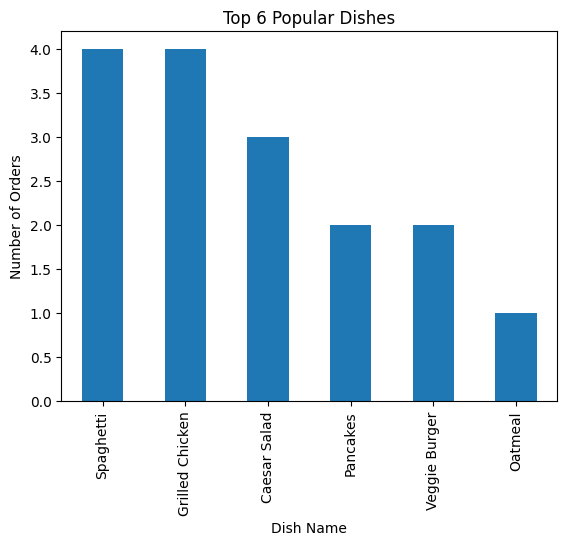

In [30]:
# Example: Popular dishes based on the number of orders
popular_dishes = merged_data['Dish Name_x'].value_counts().head(10)
popular_dishes.plot(kind='bar', title='Top 6 Popular Dishes')
plt.ylabel('Number of Orders')
plt.xlabel('Dish Name')
plt.show()


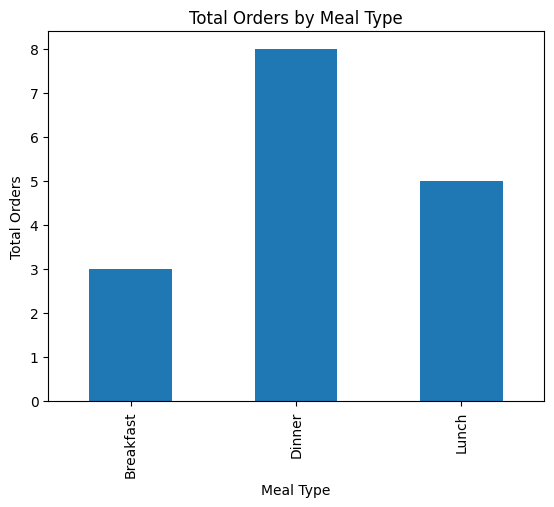

In [31]:
meal_type_analysis.plot(kind='bar', x='Meal Type_x', y='total_orders', title="Total Orders by Meal Type", legend=False)
plt.ylabel('Total Orders')
plt.xlabel('Meal Type')
plt.show()

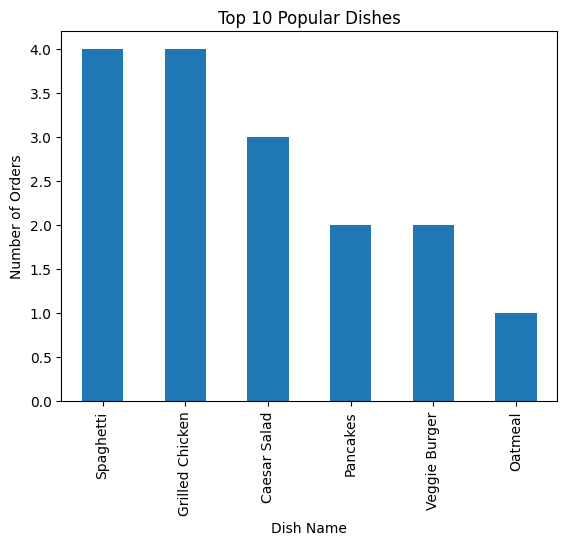

In [32]:
# Count the popularity of dishes based on the number of orders
popular_dishes = merged_data['Dish Name_x'].value_counts().head(10)

# Visualize the top 10 popular dishes
popular_dishes.plot(kind='bar', title="Top 10 Popular Dishes", legend=False)
plt.ylabel('Number of Orders')
plt.xlabel('Dish Name')
plt.show()

**Business Recommendations:**

Focus on Dinner meals: Since Dinner orders are more frequent, special promotions or discounts during dinner hours could increase sales.

Increase Variety in Breakfast Options: Breakfast orders seem to have a smaller volume. Introducing new breakfast dishes could help attract more users during morning hours.

Leverage Popular Dishes: Dishes like Spaghetti and Caesar Salad can be used for special deals or as recommended dishes.

**Insights**:

Popular dishes such as Spaghetti or Caesar Salad dominate orders.

The relationship between meal types (Breakfast, Lunch, Dinner) and user orders shows that Dinner orders tend to be higher in volume.